### THE SPARKS FOUNDATION - TASKS

#### PREDICTION USING UNSUPERVISED LEARNING IN MACHINE LEARNING (LEVEL - BEGINNER)

DATASET : IRIS - https://bit.ly/3kXTdox

**AUTHOR : PREETHI P**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [22]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.shape

(150, 6)

In [24]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
#Since we are supposed to cluster them, let's remove the target variable 
#Let's remove Id as does not help in clustering

X = df.iloc[:,[1,2,3,4]].values

In [26]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
wcss = []

In [28]:
for i in range(1,11):
    kmeans1 = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=200,
                    n_init = 10,
                    random_state=612)
    kmeans1.fit(X)
    wcss.append(kmeans1.inertia_)

In [29]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.19846461871464,
 30.423111265948226,
 27.964318181818197,
 26.22787646667059]

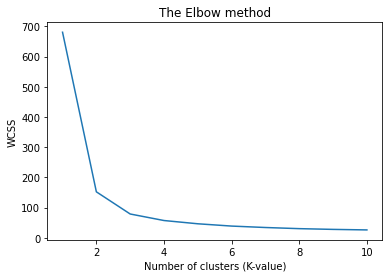

In [30]:
#wcss - within cluster sum of squares

plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters (K-value)')
plt.ylabel('WCSS')
plt.show()

#### The optimum cluster is the point where the elbow occurs.<br><br>It occurs at 3. Hence the number of clusters is 3.

In [31]:
#Now, let's apply 3 as number of clusters to our model

In [61]:
k_model = KMeans(n_clusters=3,
                 init='k-means++',
                 max_iter=500,
                 n_init=10,
                 random_state=126
                 )
y_pred =  k_model.fit_predict(X)

In [62]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [63]:
df['Species'].replace('Iris-setosa',0,inplace=True)
df['Species'].replace('Iris-versicolor',1,inplace=True)
df['Species'].replace('Iris-virginica',2,inplace=True)

In [64]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [65]:
y_test = df.iloc[:,[5]].values

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [68]:
accuracy_score(y_test,y_pred)

0.8933333333333333

#### The accuracy of our model is 0.8933 which shows that our model is well trained and predicts the optimum results.

In [69]:
#Visualizing the clusters

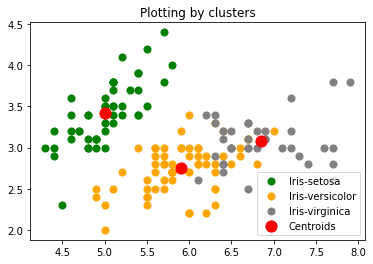

In [38]:
plt.scatter(X[y_pred == 0,0],
            X[y_pred == 0,1],
            s = 50,
            c = 'green',
            label = 'Iris-setosa')
plt.scatter(X[y_pred == 1,0],
            X[y_pred == 1,1],
            s = 50,
            c = 'orange',
            label = 'Iris-versicolor')
plt.scatter(X[y_pred == 2,0],
            X[y_pred == 2,1],
            s = 50,
            c = 'grey',
            label = 'Iris-virginica')

plt.scatter(k_model.cluster_centers_[:,0],
            k_model.cluster_centers_[:,1],
            s = 125,
            c = 'red',
            label = 'Centroids')

plt.title('Plotting by clusters')

plt.legend()

Hence the number of clusters is found using K-means clustering method and visualized.